# How to Train YOLOv5 on a Custom Dataset


## **Steps Covered in this Tutorial**

To train our detector we take the following steps:

* Install YOLOv7 dependencies
* Load custom dataset from Roboflow in YOLOv7 format
* Run YOLOv7 training
* Evaluate YOLOv7 performance
* Run YOLOv7 inference on test images
* OPTIONAL: Deployment
* OPTIONAL: Active Learning


## Preparing a Custom Dataset

In this tutorial, we will utilize an open source computer vision dataset from one of the 90,000+ available on [Roboflow Universe](https://universe.roboflow.com).

If you already have your own images (and, optionally, annotations), you can convert your dataset using [Roboflow](https://roboflow.com), a set of tools developers use to build better computer vision models quickly and accurately. 100k+ developers use roboflow for (automatic) annotation, converting dataset formats (like to YOLOv7), training, deploying, and improving their datasets/models.

Follow [the getting started guide here](https://docs.roboflow.com/quick-start) to create and prepare your own custom dataset.

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14329, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 14329 (delta 78), reused 82 (delta 41), pack-reused 14194
Receiving objects: 100% (14329/14329), 13.42 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (9893/9893), done.
/content/yolov5


# Download Correctly Formatted Custom Data

Next, we'll download our dataset in the right format. Use the `YOLOv7 PyTorch` export. Note that this model requires YOLO TXT annotations, a custom YAML file, and organized directories. The roboflow export writes this for us and saves it in the correct spot.


In [ ]:
# REPLACE with your custom code snippet generated above

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yqGHzJpS1J9cKRcFIy4H")
project = rf.workspace("karandeep-padam").project("weapons-2")
dataset = project.version(1).download("yolov5")

# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv5 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

In [ ]:
#replace the path --data data.yaml with your yaml file 
!python train.py --img 416 --batch 32 --epochs 100 --data Weapons-2-1/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=Weapons-2-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [ ]:
#replace the data source and weights paths
output = !python detect.py --source /content/yolov5/Weapons-2-1/test/images --img-size 416 --conf 0.4 --weights /content/yolov5/runs/train/exp/weights/best.pt

In [ ]:
print(output)

["\x1b\x1bdetect: \x1bweights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/Weapons-2-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1", 'YOLOv5 🚀 v6.2-205-geef9057 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)', '', 'Fusing layers... ', 'YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs', 'image 1/295 /content/yolov5/Weapons-2-1/test/images/2--111-_jpg.rf.d4275ab5521e4fa55be0bec4e66815a4.jpg: 416x416 1 rifle, 8.2ms', 'image 2/295 /content/yolov5/Weapons-2-1/test/images/2--121-_jpg.rf.0f9e9d1c0ef4a3df8f06fcc2bfd3bb5b.jpg: 416x416 1 rifle, 8.1ms', 'image 3/295 /conte

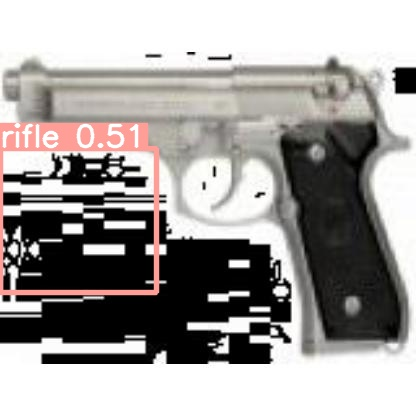

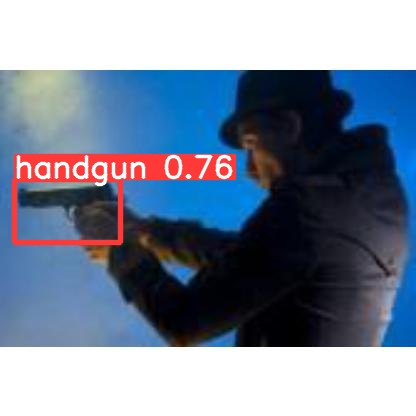

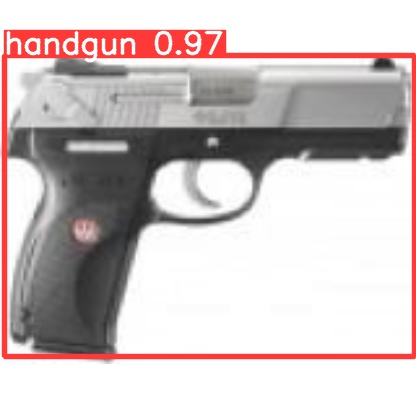

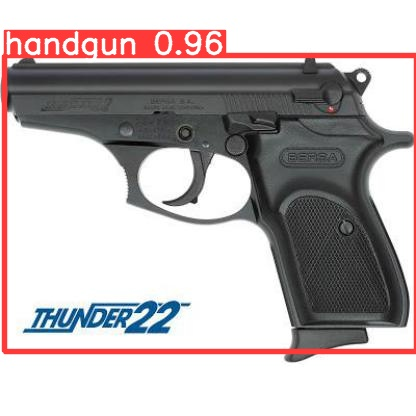

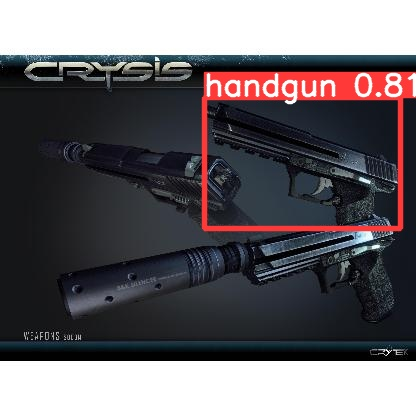

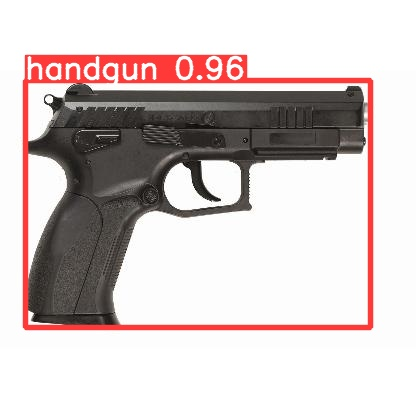

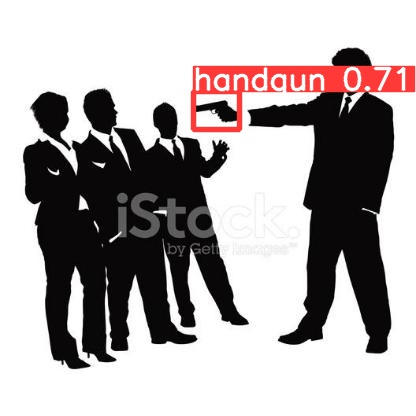

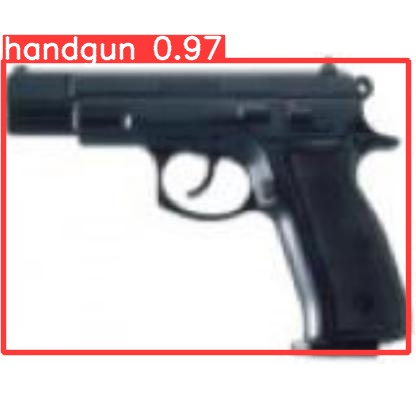

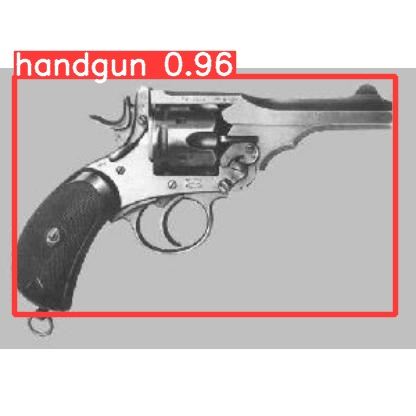

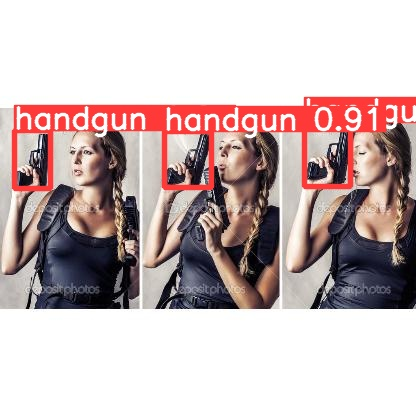

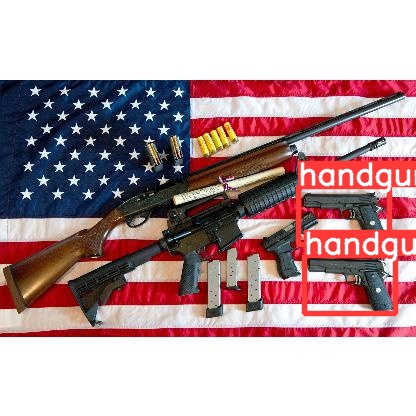

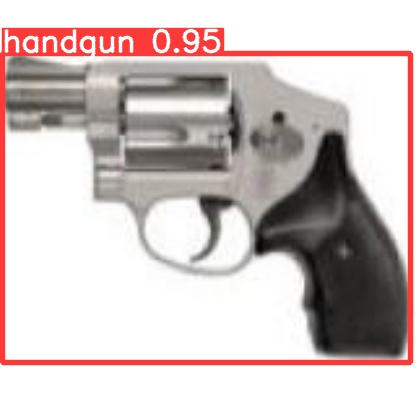

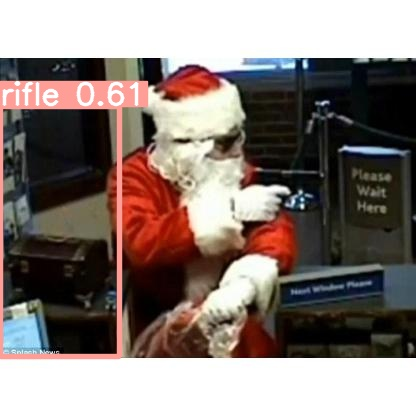

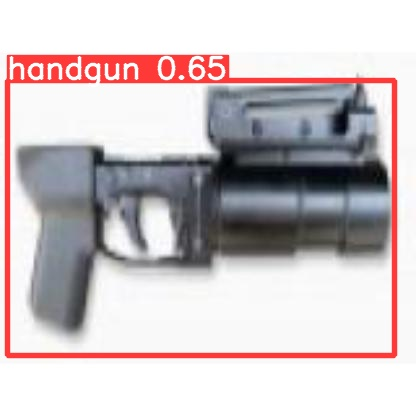

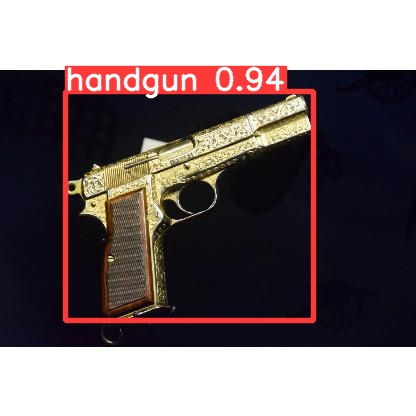

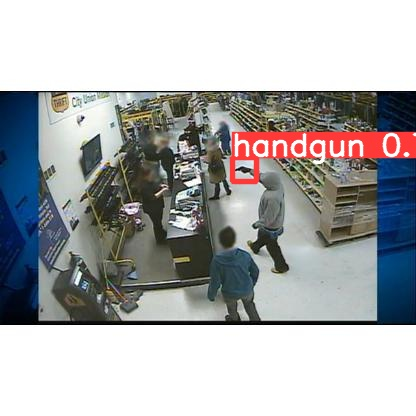

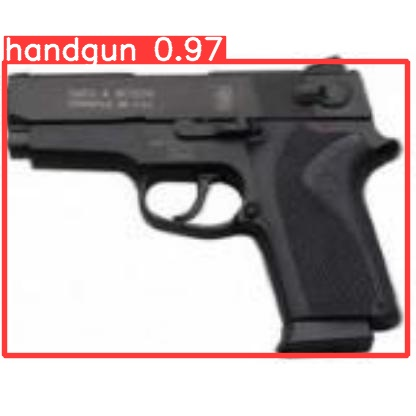

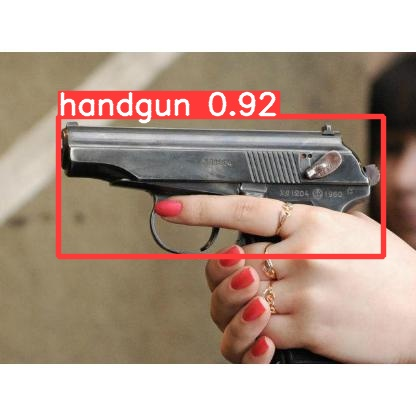

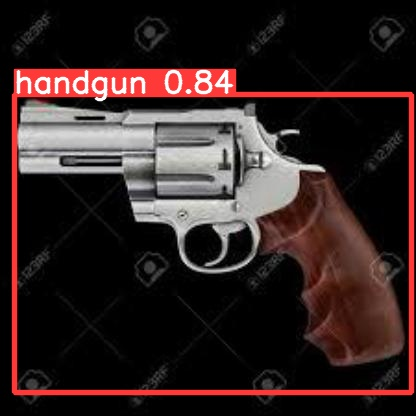

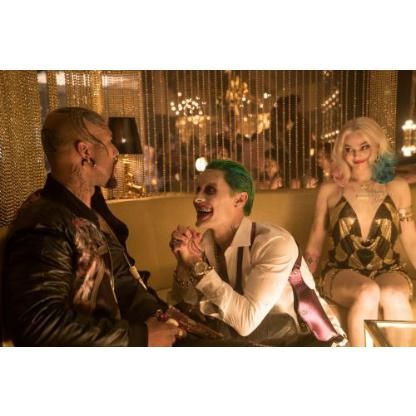

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 20 # max images to print
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*'): 
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1
    

# SINGLE IMAGE PREDICTIONS


In [ ]:
output = !python yolov5/detect.py --source /content/bcc/images/valid/BloodImage_00000.jpg --weights '/content/runs/exp0_BCCM/weights/best.pt'
print(output)

# Video

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


i =0
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/gun.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
fps = cap.get(cv2.CAP_PROP_FPS) # float `fps`


# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    # Display the resulting frame
    # cv2_imshow(frame)
    # Filename
    filename = f'images/img{i:03}.jpg'
  
    # Using cv2.imwrite() method
    # Saving the image
    cv2.imwrite(filename, frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
    i+=1
  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()


# Closes all the frames
cv2.destroyAllWindows()



In [ ]:
import torch
import glob
# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')  # local model

# Images
imgs = glob.glob('/content/yolov5/images/*')  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]


In [ ]:
output_path = 'video.mp4'
output_dim = (int(width), int(height))
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), int(fps), output_dim)

files = sorted(glob.glob('/content/yolov5/runs/detect/exp5/*'))
for f in files:
  image = cv2.imread(f) 
  out.write(image)
out.release()

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "video.mp4"

# Compressed video path
compressed_path = "video_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*